Splits images into closed and open eyes in two different folders using labels

In [2]:

import os
import os.path
import shutil

new_path = os.path.join("C:/Users/hrithik/Documents/Projects/eyeImagesSeperated", "closed")
if not os.path.exists(new_path):
    os.makedirs(new_path)

new_path = os.path.join("C:/Users/hrithik/Documents/Projects/eyeImagesSeperated", "open")
if not os.path.exists(new_path):
    os.makedirs(new_path)


# options
imgs = []
foldersToBrowse = [
    "s0001",
    "s0002", 
    "s0003", 
    "s0004", 
    "s0005", 
    "s0006",
    "s0007",
    "s0008",
    "s0009",
    "s0010",
    "s0011",
    "s0012",
    "s0013",
    "s0014",
    "s0015",
    "s0016",
    "s0017",
    "s0018",
    "s0019",
    "s0020",
    "s0021", 
    "s0022", 
    "s0023", 
    "s0024", 
    "s0025",
    "s0026",
    "s0027",
    "s0028",
    "s0029",
    "s0030",
    "s0031",
    "s0032",
    "s0033",
    "s0034",
    "s0035",
    "s0036",
    "s0037"
]

# opened = 1, closed = 0
eyeState=0

new_path="C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated"

if(eyeState == 0):
    new_path = os.path.join(new_path, "closed")
elif(eyeState == 1):
    new_path = os.path.join(new_path, "open")


for i in foldersToBrowse:
    folder_path= os.path.join('C:/Users/hrithik/Documents/Projects/mrlEyes_2018_01/mrlEyes_2018_01/', i)
    images = [f for f in os.listdir(folder_path) if (os.path.isfile(os.path.join(folder_path, f)) and f.split("_")[4] == str(eyeState))]
    for image in images:
        old_image_path = os.path.join(folder_path, image)
        new_image_path = os.path.join(new_path, image)
        shutil.move(old_image_path, new_image_path)


print("Done")


Done


Try to extract drowsy images from images labelled as closed

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


folder_path= 'C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\closed'
new_path = "C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperatedTesting\\closed"
images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

alreadyAdded = []
for _ in range(5000):
    randomPickImage = random.randint(0, len(images)-1)
    while(randomPickImage in alreadyAdded):
        randomPickImage = random.randint(0, len(images)-1)

    old_image_path = os.path.join(folder_path, images[randomPickImage])
    new_image_path = os.path.join(new_path, images[randomPickImage]) 
    shutil.move(old_image_path, new_image_path)
    alreadyAdded.append(randomPickImage)

print("Done")


# plt.imshow(imgs[3], cmap='gray')

Done


In [ ]:
%matplotlib auto
import dlib

# intialise dlib's pretrained face detector
detector = dlib.get_frontal_face_detector()
# loads dlib pretrained facial landmarks to detector
dlib_facelandmark = dlib.shape_predictor(
    "C:\\Users\\hrithik\\Documents\\Projects\\fyp-idea\\websocket-server\\ai\\shape_predictor_68_face_landmarks.dat")
# 

img = cv2.imread('C:\\Users\\hrithik\\Pictures\\img047.jpg') 
# img = cv2.imread(os.path.join('C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\open', images[1])) 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# plt.imshow(img, cmap='gray')

In [ ]:
import tensorflow as tf
import cv2
import numpy as np

img_size = 224
img_array = cv2.imread('C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\closed\\s0001_00835_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
X_input = X_input/255.0

new_model = tf.keras.models.load_model('my_model.h5')

prediction = new_model.predict(X_input)


print(prediction)

if(prediction < 0.5):
    print("Awake")




In [101]:
import os
import numpy as np
import cv2
from os.path import join, dirname, realpath
import matplotlib.pyplot as plt
import dlib
from scipy.spatial import distance
import pandas as pd
from tqdm import tqdm

detector = dlib.get_frontal_face_detector()
dlib_facelandmark = dlib.shape_predictor(
    "C:\\Users\\hrithik\\Documents\\Projects\\fyp-idea\\websocket-server\\ai\\shape_predictor_68_face_landmarks.dat")

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')


folder_path= 'C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\closed'
images = [f for f in os.listdir(folder_path) if (os.path.isfile(os.path.join(folder_path, f)))]

ear_values = []

for i in tqdm(images):
    leftEye = []
    img = cv2.imread('face-of-peter-1433842.jpg')

    img_to_place = cv2.imread(os.path.join(folder_path, i))

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_to_place = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    img_h, img_w = gray.shape
    img_to_place_h, img_to_place_w = gray_to_place.shape

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            resized_img = cv2.resize(img_to_place, (eh, ew), interpolation = cv2.INTER_AREA)
            resized_img_h, resized_img_w, _ = resized_img.shape

            roi_color[ey:ey+resized_img_h, ex:ex+resized_img_w, :] = resized_img

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # plt.figure()
    # plt.imshow(gray, "gray")
    # plt.show()  # display it

    faces = detector(gray)

    face_landmarks = dlib_facelandmark(gray, faces[0])


    for n in range(36, 42):
        x = face_landmarks.part(n).x
        y = face_landmarks.part(n).y
        leftEye.append((x, y))
        next_point = n+1
        if n == 41:
            next_point = 36
        x2 = face_landmarks.part(next_point).x
        y2 = face_landmarks.part(next_point).y
        cv2.line(gray, (x, y), (x2, y2), (0, 255, 0), 1)

    left_ear = calculate_EAR(leftEye)
    EAR = round(left_ear, 2)
    ear_values.append([i, EAR])

ear_values_output = pd.DataFrame(ear_values, columns=['id', 'EAR'])
ear_values_output.to_csv('ear_values.csv', index=False)

# cv2.imwrite("out.png", img)

100%|██████████| 41946/41946 [15:45<00:00, 44.34it/s]


In [7]:
import cv2

eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread('C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\closed\\s0001_00835_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)

eye = eye_cascade.detectMultiScale(img)

print(eye)

# for (x,y,) in eye:
#     print(i)


()


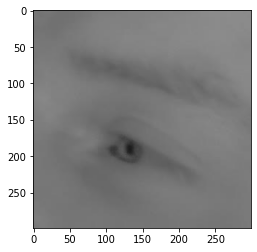

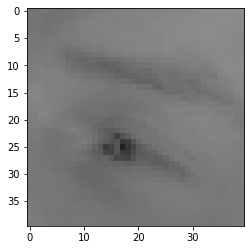

In [21]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\open\\s0031_00963_1_0_1_0_1_02.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img = cv2.imread('C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\open\\s0031_00963_1_0_1_0_1_02.png')
img = cv2.resize(img, dsize=(40,40)) ## Resizing the images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [ ]:
def calculate_EAR(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear_aspect_ratio = (A+B)/(2.0*C)
    return ear_aspect_ratio


In [ ]:
from scipy.spatial import distance

# intialise dlib's pretrained face detector
detector = dlib.get_frontal_face_detector()
# loads dlib pretrained facial landmarks to detector
dlib_facelandmark = dlib.shape_predictor(
    "C:\\Users\\hrithik\\Documents\\Projects\\fyp-idea\\websocket-server\\ai\\shape_predictor_68_face_landmarks.dat")
# 


def calculate_EAR(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear_aspect_ratio = (A+B)/(2.0*C)
    return ear_aspect_ratio


folder_path= 'C:\\Users\\hrithik\\Documents\\Projects\\eyeImagesSeperated\\closed'
images = [f for f in os.listdir(folder_path) if (os.path.isfile(os.path.join(folder_path, f)))]
for image in images:
    faces = replaceFace(os.path.join(folder_path, image))

    for face in faces:
        face_landmarks = dlib_facelandmark(gray, face)
        leftEye = []
        rightEye = []

        for n in range(36, 42):
            x = face_landmarks.part(n).x
            y = face_landmarks.part(n).y
            leftEye.append((x, y))
            next_point = n+1
            if n == 41:
                next_point = 36
            x2 = face_landmarks.part(next_point).x
            y2 = face_landmarks.part(next_point).y
            cv2.line(gray, (x, y), (x2, y2), (0, 255, 0), 1)

        for n in range(42, 48):
            x = face_landmarks.part(n).x
            y = face_landmarks.part(n).y
            rightEye.append((x, y))
            next_point = n+1
            if n == 47:
                next_point = 42
            x2 = face_landmarks.part(next_point).x
            y2 = face_landmarks.part(next_point).y
            cv2.line(gray, (x, y), (x2, y2), (0, 255, 0), 1)

        left_ear = calculate_EAR(leftEye)

        EAR = left_ear
        EAR = round(EAR, 2)
        print(EAR)


